In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
# reading the dataset
data=pd.read_excel('iris (2).xls')

In [3]:
#head
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
# summary of the dataset: 150 rows, 5 columns,  null values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

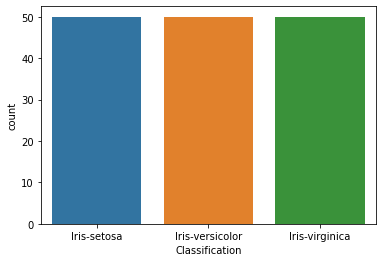

In [8]:
# count plot of species feature using seaborn
sns.countplot(data['Classification']);

##  Data Preprocessing

In [9]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
### Let's understand the distribution of data

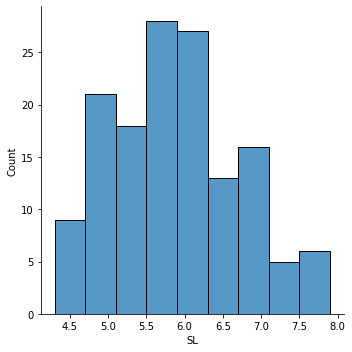

In [11]:
sns.displot(data['SL'])
plt.show()

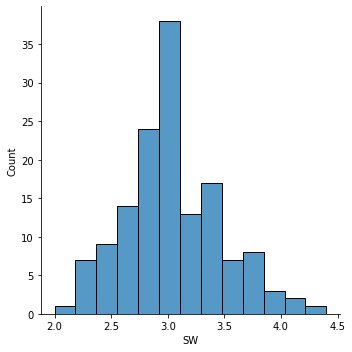

In [12]:
sns.displot(data['SW'])
plt.show()

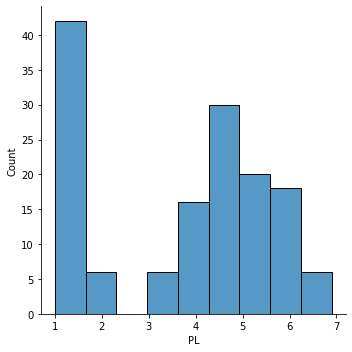

In [13]:
sns.displot(data['PL'])
plt.show()

### Handling missing values

In [14]:
SL_median = data['SL'].median()
data['SL'] = data['SL'].fillna(SL_median)

SL_median = data['SW'].median()
data['SW'] = data['SW'].fillna(SL_median)

SL_median = data['PL'].median()
data['PL'] = data['PL'].fillna(SL_median)

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# Null values are handlied

### Outliers in data

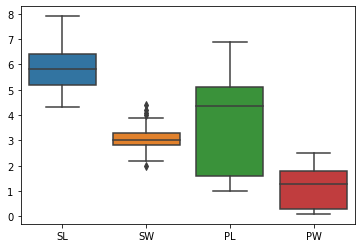

In [17]:
sns.boxplot(data=data)
plt.show()

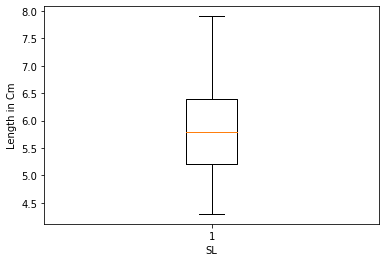

In [56]:
plt.boxplot(data['SL'])
plt.xlabel('SL')
plt.ylabel('Length in Cm')
plt.show()

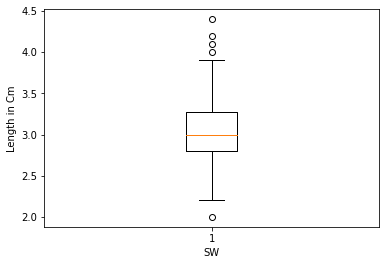

In [57]:
plt.boxplot(data['SW'])
plt.xlabel('SW')
plt.ylabel('Length in Cm')
plt.show()

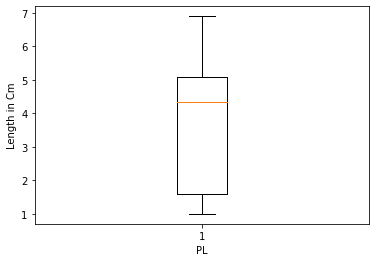

In [58]:
plt.boxplot(data['PL'])
plt.xlabel('PL')
plt.ylabel('Length in Cm')
plt.show()

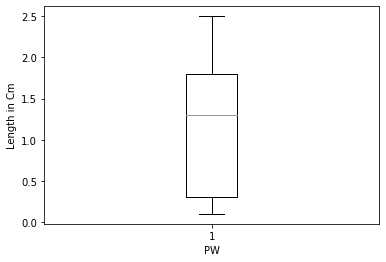

In [59]:
plt.boxplot(data['PW'])
plt.xlabel('PW')
plt.ylabel('Length in Cm')
plt.show()

### There are few outliers present, since data contain 150 rows only, we are not eliminate the outliers

##  Data Preparation 

In [22]:
# split into x and y
inde_fe=['SL', 'SW', 'PL', 'PW']
x=data[inde_fe]
y=data['Classification']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# split into train and test
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.describe()

,SL,SW,PL,PW
count,120.000000,120.000000,120.000000,120.000000
mean,5.830833,3.049167,3.757083,1.182500
std,0.805735,0.432308,1.708755,0.753442
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.325000,3.300000,5.025000,1.800000
max,7.700000,4.400000,6.700000,2.500000


##  Model Building and Evaluation

### 1.Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(accuracy_score(y_test,y_pred_lr))

1.0


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred_lr)

1.0

### 2. kNN model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)

In [31]:
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9666666666666667

In [32]:
lst_acc=[]
neighbors=range(3,20,2)
for i in range(3,20,2):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    lst_acc.append(acc)

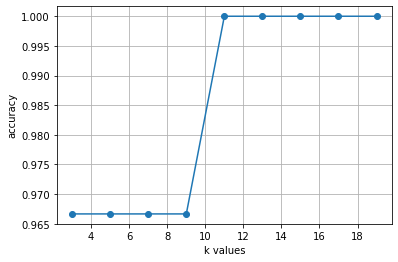

In [33]:
plt.plot(neighbors,lst_acc,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()

In [34]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

1.0

### 3.DecisionTreeClassifier model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)

1.0

### 4.RandomForestClassifier model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

1.0

### 5.SVM(Support vector Machine) model

In [37]:
from sklearn.svm import SVC

In [38]:
# linear 
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(x_train,y_train)
y_pred_svm=clf_svm.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred_svm)

1.0

In [40]:
# Radial Basis Function (RBF)
clf_svm_rbf=SVC(kernel='rbf')
clf_svm_rbf=clf_svm_rbf.fit(x_train,y_train)
y_pred_svm_rbf=clf_svm_rbf.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred_svm_rbf)

1.0

## scaling

In [42]:
# Lets try scaling using standard scaler


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr1= LogisticRegression(max_iter=5000)
lr1.fit(x_train,y_train)
y_pred=lr1.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn1= KNeighborsClassifier(n_neighbors=15)
knn1.fit(x_train,y_train)
y_pred=knn1.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

#### There is not much difference in scaled data.

### Conclusion

### All models gives same results, this may because of small data size and less complexity of dataset.

### Cross validation of models

In [50]:
from sklearn.model_selection import cross_validate

## LogisticRegression
cvs_lr=cross_validate(lr,x,y,cv=5)
cvs_lr['test_score'].mean()


0.9466666666666667

In [51]:
## KNeighborsClassifier
cvs_knn=cross_validate(knn,x,y,cv=5)
cvs_knn['test_score'].mean()

0.9533333333333334

In [52]:
## DecisionTreeClassifier
cvs_dt=cross_validate(dt,x,y,cv=5)
cvs_dt['test_score'].mean()

0.9399999999999998

In [53]:
## RandomForestClassifier
cvs_rf=cross_validate(rf,x,y,cv=5)
cvs_rf['test_score'].mean()


0.9666666666666668

In [54]:
## SVM
cvs_svm=cross_validate(clf_svm,x,y,cv=5)
cvs_svm['test_score'].mean()

0.9600000000000002

In [55]:
## SVM
cvs_svm_rbf=cross_validate(clf_svm_rbf,x,y,cv=5)
cvs_svm_rbf['test_score'].mean()

0.9400000000000001

### Cross validation results shows RandomForestClassifier, kNN and SVM  gives  better results.Since the dataset is very small, all models performs almost equally well with the given dataset.Generally no single algorithm works best for every problem. It depend on the complexity and distribution of data.Since this is a small dataset, every models perform well with this dataset.